In [1]:
import numpy as np
import pandas as pd 
from numpy import log, exp
from itertools import product 
import matplotlib.pyplot as plt 
from scipy.stats import lognorm
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from skforecast.metrics import symmetric_mean_absolute_percentage_error as smape

Compute the RMSE and Symmetric Mean Absolute Percentage Error (sMAPE) of the predictions:

For actual values \( y_t \) and predictions \( \hat{y}_t \):

$$\text{sMAPE} = \frac{100\%}{n} \sum_{t=1}^n \frac{|y_t - \hat{y}_t|}{\frac{|y_t| + |\hat{y}_t|}{2}}$$

Parametros estimados pela CDF:

In [2]:
df_cdf = pd.read_csv('results/preds_CDF.csv')

df_cdf.loc[df_cdf.mu.isna(), ['mu', 'sigma']] = [0.01, 1/2]
df_cdf.head()

,date,lower_95,lower_90,lower_80,lower_50,pred,upper_50,upper_80,upper_90,upper_95,valid_test,state,model_id,mu,sigma
0,2024-10-06,22.422222,40.304679,79.162970,244.274988,853.700012,2982.915845,9196.810733,18041.732884,32366.797486,3,RS,108,6.748348,1.855412
1,2024-10-13,18.743651,34.187301,68.269130,216.515891,779.997873,2809.263104,8900.886361,17748.532118,32294.740637,3,RS,108,6.657830,1.900458
2,2024-10-20,6.581569,12.226861,24.874887,81.165077,301.351891,1118.132411,3638.484729,7371.869282,13600.483733,3,RS,108,5.704178,1.945792
3,2024-10-27,17.097895,32.060474,66.082749,220.934380,843.905436,3222.679992,10763.205908,22149.610067,41420.387215,3,RS,108,6.736465,1.987314
4,2024-11-03,18.724941,35.572182,74.438413,255.270334,1003.039414,3940.407380,13500.169745,28209.239339,53454.977878,3,RS,108,6.909363,2.029238


In [3]:
df_cdf.isnull().sum()

date          0
lower_95      0
lower_90      0
lower_80      0
lower_50      0
pred          0
upper_50      0
upper_80      0
upper_90      0
upper_95      0
valid_test    0
state         0
model_id      0
mu            0
sigma         0
dtype: int64

Parâmetros estimados pela KL:

In [4]:
df_kl = pd.read_csv('results/preds_KL.csv')

#df_kl.loc[df_kl.mu.isna(), ['mu', 'sigma']] = [0.01, 1/2]
df_kl.head()

,date,lower_95,lower_90,lower_80,lower_50,pred,upper_50,upper_80,upper_90,upper_95,valid_test,state,model_id,mu,sigma
0,2024-10-06,22.422222,40.304679,79.162970,244.274988,853.700012,2982.915845,9196.810733,18041.732884,32366.797486,3,RS,108,6.195184,1.748367
1,2024-10-13,18.743651,34.187301,68.269130,216.515891,779.997873,2809.263104,8900.886361,17748.532118,32294.740637,3,RS,108,6.091297,1.790893
2,2024-10-20,6.581569,12.226861,24.874887,81.165077,301.351891,1118.132411,3638.484729,7371.869282,13600.483733,3,RS,108,5.124968,1.834564
3,2024-10-27,17.097895,32.060474,66.082749,220.934380,843.905436,3222.679992,10763.205908,22149.610067,41420.387215,3,RS,108,6.144043,1.872778
4,2024-11-03,18.724941,35.572182,74.438413,255.270334,1003.039414,3940.407380,13500.169745,28209.239339,53454.977878,3,RS,108,6.304380,1.912227


In [5]:
df_kl.columns

Index(['date', 'lower_95', 'lower_90', 'lower_80', 'lower_50', 'pred',
       'upper_50', 'upper_80', 'upper_90', 'upper_95', 'valid_test', 'state',
       'model_id', 'mu', 'sigma'],
      dtype='object')

In [6]:
df_aprox = df_cdf.merge(df_kl, left_on = ['date', 'lower_95', 'lower_90', 'lower_80', 'lower_50', 'pred',
       'upper_50', 'upper_80', 'upper_90', 'upper_95', 'valid_test', 'state',
       'model_id'], right_on =['date', 'lower_95', 'lower_90', 'lower_80', 'lower_50', 'pred',
       'upper_50', 'upper_80', 'upper_90', 'upper_95', 'valid_test', 'state',
       'model_id'],suffixes=('_cdf', '_kl') 
            )

df_aprox.date = pd.to_datetime(df_aprox.date)

df_aprox = df_aprox.loc[df_aprox.pred > 1]
df_aprox.head()

,date,lower_95,lower_90,lower_80,lower_50,pred,upper_50,upper_80,upper_90,upper_95,valid_test,state,model_id,mu_cdf,sigma_cdf,mu_kl,sigma_kl
0,2024-10-06,22.422222,40.304679,79.162970,244.274988,853.700012,2982.915845,9196.810733,18041.732884,32366.797486,3,RS,108,6.748348,1.855412,6.195184,1.748367
1,2024-10-13,18.743651,34.187301,68.269130,216.515891,779.997873,2809.263104,8900.886361,17748.532118,32294.740637,3,RS,108,6.657830,1.900458,6.091297,1.790893
2,2024-10-20,6.581569,12.226861,24.874887,81.165077,301.351891,1118.132411,3638.484729,7371.869282,13600.483733,3,RS,108,5.704178,1.945792,5.124968,1.834564
3,2024-10-27,17.097895,32.060474,66.082749,220.934380,843.905436,3222.679992,10763.205908,22149.610067,41420.387215,3,RS,108,6.736465,1.987314,6.144043,1.872778
4,2024-11-03,18.724941,35.572182,74.438413,255.270334,1003.039414,3940.407380,13500.169745,28209.239339,53454.977878,3,RS,108,6.909363,2.029238,6.304380,1.912227


In [7]:
df_aprox.isnull().sum()

date          0
lower_95      0
lower_90      0
lower_80      0
lower_50      0
pred          0
upper_50      0
upper_80      0
upper_90      0
upper_95      0
valid_test    0
state         0
model_id      0
mu_cdf        0
sigma_cdf     0
mu_kl         0
sigma_kl      0
dtype: int64

Mediana e percentil de 95% estimado por cada uma das aproximações: 

In [8]:
for lb in ['cdf', 'kl']: 
    df_aprox[f'med_{lb}'] = lognorm.ppf(0.5, scale=np.exp(df_aprox[f'mu_{lb}'].values), s=df_aprox[f'sigma_{lb}'].values)
    df_aprox[f'upper_95_{lb}'] = lognorm.ppf(0.975, scale=np.exp(df_aprox[f'mu_{lb}'].values), s=df_aprox[f'sigma_{lb}'].values)

df_aprox.head()

,date,lower_95,lower_90,lower_80,lower_50,pred,upper_50,upper_80,upper_90,upper_95,...,state,model_id,mu_cdf,sigma_cdf,mu_kl,sigma_kl,med_cdf,upper_95_cdf,med_kl,upper_95_kl
0,2024-10-06,22.422222,40.304679,79.162970,244.274988,853.700012,2982.915845,9196.810733,18041.732884,32366.797486,...,RS,108,6.748348,1.855412,6.195184,1.748367,852.649066,32366.799648,490.381789,15092.005526
1,2024-10-13,18.743651,34.187301,68.269130,216.515891,779.997873,2809.263104,8900.886361,17748.532118,32294.740637,...,RS,108,6.657830,1.900458,6.091297,1.790893,778.858945,32294.741711,441.994115,14785.207169
2,2024-10-20,6.581569,12.226861,24.874887,81.165077,301.351891,1118.132411,3638.484729,7371.869282,13600.483733,...,RS,108,5.704178,1.945792,5.124968,1.834564,300.118787,13600.484180,168.168752,6128.148016
3,2024-10-27,17.097895,32.060474,66.082749,220.934380,843.905436,3222.679992,10763.205908,22149.610067,41420.387215,...,RS,108,6.736465,1.987314,6.144043,1.872778,842.576791,41420.399460,465.933465,18299.326199
4,2024-11-03,18.724941,35.572182,74.438413,255.270334,1003.039414,3940.407380,13500.169745,28209.239339,53454.977878,...,RS,108,6.909363,2.029238,6.304380,1.912227,1001.608756,53454.984646,546.962269,23208.549166


In [9]:
df_aprox.isnull().sum()

date            0
lower_95        0
lower_90        0
lower_80        0
lower_50        0
pred            0
upper_50        0
upper_80        0
upper_90        0
upper_95        0
valid_test      0
state           0
model_id        0
mu_cdf          0
sigma_cdf       0
mu_kl           0
sigma_kl        0
med_cdf         0
upper_95_cdf    0
med_kl          0
upper_95_kl     0
dtype: int64

In [10]:
df_aprox = df_aprox.loc[df_aprox.state != 'ES']

Erro RMSE entre as medias e percentil superior de 95% estimados por cada uma das aproximações: 

In [11]:
df_erros = pd.DataFrame()

for model, state, val_test in product(df_aprox['model_id'].unique(), df_aprox['state'].unique(), df_aprox['valid_test'].unique()):

    try: 
        df_model = df_aprox.loc[(df_aprox.model_id == model) & (df_aprox.state == state) & (df_aprox.valid_test == val_test)]
    
        df_erros = pd.concat([df_erros,
                             pd.DataFrame([[state, model, val_test, 
                                            rmse(df_model.pred, df_model.med_cdf), 
                                            rmse(df_model.upper_95, df_model.upper_95_cdf),
                                            rmse(df_model.pred, df_model.med_kl), 
                                            rmse(df_model.upper_95, df_model.upper_95_kl),
                                            smape(df_model.pred, df_model.med_cdf), 
                                            smape(df_model.upper_95, df_model.upper_95_cdf),
                                            smape(df_model.pred, df_model.med_kl), 
                                            smape(df_model.upper_95, df_model.upper_95_kl)]],
                                         columns = ['state', 'model_id', 'validation_test', 'rmse_pred_cdf', 'rmse_upper_cdf',
                                                    'rmse_pred_kl', 'rmse_upper_kl', 'mape_pred_cdf', 'mape_upper_cdf',
                                                    'mape_pred_kl', 'mape_upper_kl'])],
                            ignore_index = True)
    except: 
        pass 

df_erros.head()

,state,model_id,validation_test,rmse_pred_cdf,rmse_upper_cdf,rmse_pred_kl,rmse_upper_kl,mape_pred_cdf,mape_upper_cdf,mape_pred_kl,mape_upper_kl
0,RS,108,3,9.163520,1.134966,22077.740463,6.451974e+06,0.329180,0.000010,78.197932,102.143345
1,RS,108,2,10.931199,0.236537,4247.885719,1.495112e+06,1.560968,0.000009,81.280139,103.122699
2,RS,108,1,17.635729,0.099418,2145.906696,7.118213e+05,4.918188,0.000009,82.436067,103.011462
3,RN,108,3,0.194132,0.000156,67.324096,6.573053e+02,0.158172,0.000004,29.942786,40.789006
4,RN,108,2,2.447819,0.000203,21.049625,1.888597e+03,6.837630,0.000006,60.581938,76.475053


Summary comparing the methodologys: 

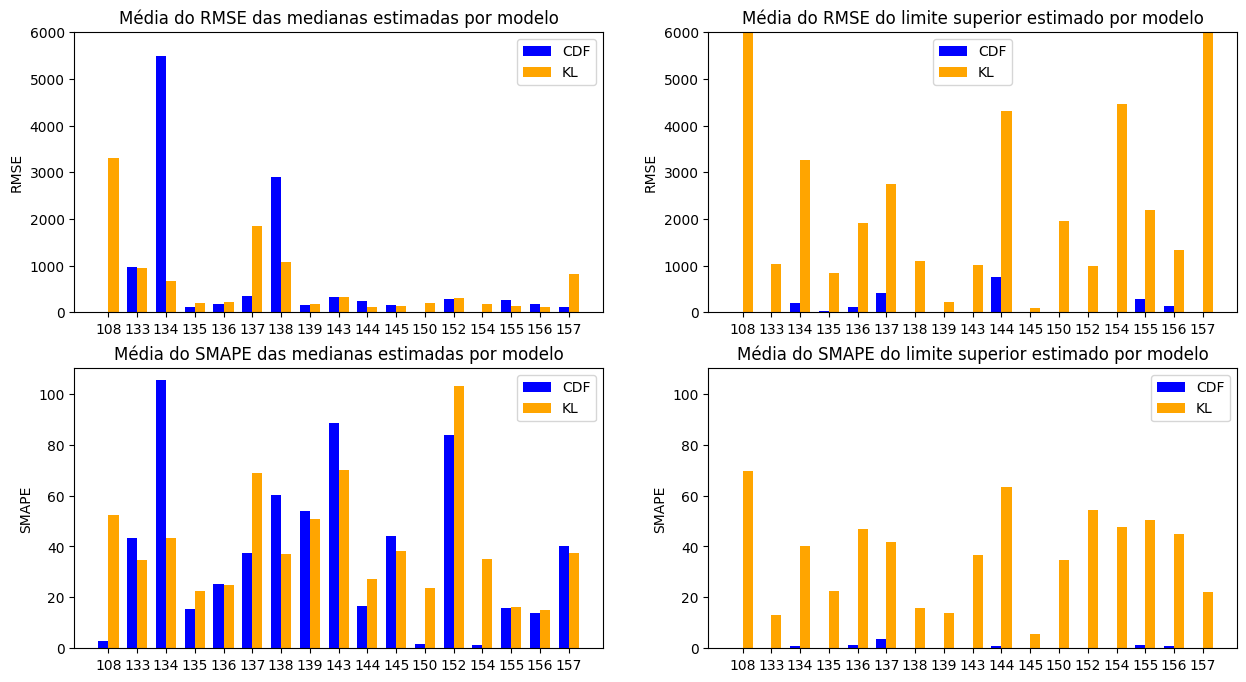

In [33]:
_, ax = plt.subplots(2, 2, figsize=(15, 8))

# Group data
pred_cdf = df_erros.groupby('model_id')[['rmse_pred_cdf']].mean()
upper_cdf = df_erros.groupby('model_id')[['rmse_upper_cdf']].mean()

pred_kl = df_erros.groupby('model_id')[['rmse_pred_kl']].mean()
upper_kl = df_erros.groupby('model_id')[['rmse_upper_kl']].mean()

pred_cdf_mape = df_erros.groupby('model_id')[['mape_pred_cdf']].mean()
upper_cdf_mape = df_erros.groupby('model_id')[['mape_upper_cdf']].mean()

pred_kl_mape = df_erros.groupby('model_id')[['mape_pred_kl']].mean()
upper_kl_mape = df_erros.groupby('model_id')[['mape_upper_kl']].mean()


x = np.arange(len(pred_cdf))  # positions for bars
width = 0.35  # width of the bars

# First subplot: side-by-side bars
ax[0,0].bar(x - width/2, pred_cdf.rmse_pred_cdf.values, width, label='CDF', color='blue')
ax[0,0].bar(x + width/2, pred_kl.rmse_pred_kl.values, width, label='KL', color='orange')
ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels(pred_cdf.index.astype(str))
ax[0,0].legend()

ax[0,0].set_title('Média do RMSE das medianas estimadas por modelo')
ax[0,1].set_title('Média do RMSE do limite superior estimado por modelo')
ax[0,0].set_ylabel('RMSE')
#ax[0,0].set_xlabel('Modelo') 
ax[0,1].set_ylabel('RMSE') 

# Second subplot: side-by-side bars
ax[0,1].bar(x - width/2, upper_cdf.rmse_upper_cdf.values, width, label='CDF', color='blue')
ax[0,1].bar(x + width/2, upper_kl.rmse_upper_kl.values, width, label='KL', color='orange')
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(upper_cdf.index.astype(str))
ax[0,1].legend()
ax[0,0].set_ylim([0, 6000])
ax[0,1].set_ylim([0, 6000])


ax[1,0].bar(x - width/2, pred_cdf_mape.mape_pred_cdf.values, width, label='CDF', color='blue')
ax[1,0].bar(x + width/2, pred_kl_mape.mape_pred_kl.values, width, label='KL', color='orange')
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(pred_cdf.index.astype(str))
ax[1,0].legend()

ax[1,0].set_title('Média do SMAPE das medianas estimadas por modelo')
ax[1,1].set_title('Média do SMAPE do limite superior estimado por modelo')
ax[1,0].set_ylabel('SMAPE')
#ax[0,0].set_xlabel('Modelo') 
ax[1,1].set_ylabel('SMAPE') 

# Second subplot: side-by-side bars
ax[1,1].bar(x - width/2, upper_cdf_mape.mape_upper_cdf.values, width, label='CDF', color='blue')
ax[1,1].bar(x + width/2, upper_kl_mape.mape_upper_kl.values, width, label='KL', color='orange')
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(upper_cdf.index.astype(str))
ax[1,1].legend()
ax[1,0].set_ylim([0, 110])
ax[1,1].set_ylim([0, 110])
plt.savefig('mean_erro.png', dpi = 400, bbox_inches = 'tight')
plt.show()

Modelos em que o erro da mediana do CDF é maior que o do KL: 

* 133, 134, 138, 144, 152, 155, 156

Porém, para todos eles erro no intervalo superior é menor. 

Visualização de algum modelo em detalhe: 

In [16]:
df_erros.loc[df_erros.rmse_pred_cdf == df_erros.rmse_pred_cdf.max()]

,state,model_id,validation_test,rmse_pred_cdf,rmse_upper_cdf,rmse_pred_kl,rmse_upper_kl,mape_pred_cdf,mape_upper_cdf,mape_pred_kl,mape_upper_kl
215,SP,134,3,161542.04715,0.125271,1412.503397,977.506112,183.130691,0.000092,0.726414,0.781655


In [17]:
df_erros.loc[df_erros.mape_pred_cdf == df_erros.mape_pred_cdf.max()]

,state,model_id,validation_test,rmse_pred_cdf,rmse_upper_cdf,rmse_pred_kl,rmse_upper_kl,mape_pred_cdf,mape_upper_cdf,mape_pred_kl,mape_upper_kl
162,RJ,134,2,8157.70853,9801.921369,5382.044159,90281.499265,193.216287,38.448894,113.246577,139.948533


In [18]:
df_erros.loc[(df_erros.state == 'SP') & (df_erros.model_id == 134) & (df_erros.validation_test ==3)]

,state,model_id,validation_test,rmse_pred_cdf,rmse_upper_cdf,rmse_pred_kl,rmse_upper_kl,mape_pred_cdf,mape_upper_cdf,mape_pred_kl,mape_upper_kl
215,SP,134,3,161542.04715,0.125271,1412.503397,977.506112,183.130691,0.000092,0.726414,0.781655


In [39]:
def plot_median_upper(df_aprox, model, state, val_test, save = False): 

    df_problem = df_aprox.loc[(df_aprox.model_id == model) & (df_aprox.state == state) & (df_aprox.valid_test == val_test)]

    _, ax = plt.subplots(1,3, figsize = (15, 4), sharey = True)

    ax[0].plot(df_problem.date, df_problem.pred, label = 'Real')
    
    ax[0].plot(df_problem.date, df_problem.med_cdf, label = 'CDF')
    
    ax[0].plot(df_problem.date, df_problem.med_kl, label = 'KL')
    
    ax[0].set_title('Median')
    
    ax[0].legend()
    
    ax[1].plot(df_problem.date, df_problem.upper_95 )
    
    ax[1].plot(df_problem.date, df_problem.upper_95_cdf, label = 'CDF')
    
    ax[1].plot(df_problem.date, df_problem.upper_95_kl, label = 'KL')
    
    ax[1].set_title('Upper 97.5%')
    
    ax[2].fill_between(df_problem.date, df_problem.lower_95, df_problem.upper_95, color = 'tab:blue', alpha = 0.5)
    
    ax[2].set_title('Range: lower (2.5%) - upper (97.5%)')

    plt.suptitle(f'{state} - {model} - {val_test}')

    for ax_ in ax.ravel():

        ax_.grid()
    
    plt.tight_layout()

    if save: 
        plt.savefig(f'{state}_{model}_{val_test}.png', dpi = 400, bbox_inches = 'tight')

    plt.show()

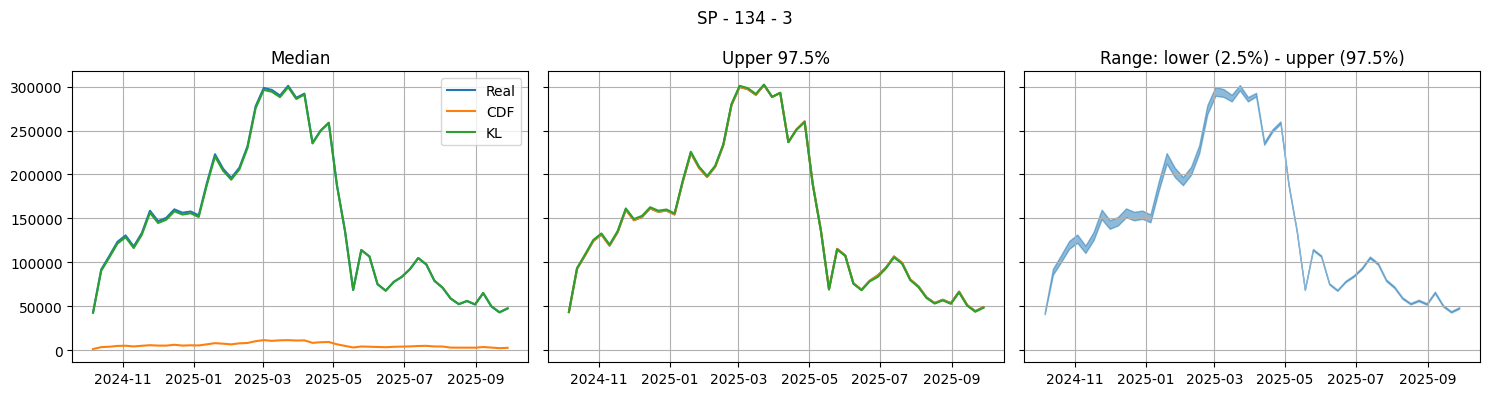

In [44]:
model = df_erros.loc[df_erros.rmse_pred_cdf == df_erros.rmse_pred_cdf.max()].model_id.values[0]
state = df_erros.loc[df_erros.rmse_pred_cdf == df_erros.rmse_pred_cdf.max()].state.values[0]
val_test = df_erros.loc[df_erros.rmse_pred_cdf == df_erros.rmse_pred_cdf.max()].validation_test.values[0]

plot_median_upper(df_aprox, model, state, val_test, save= True)


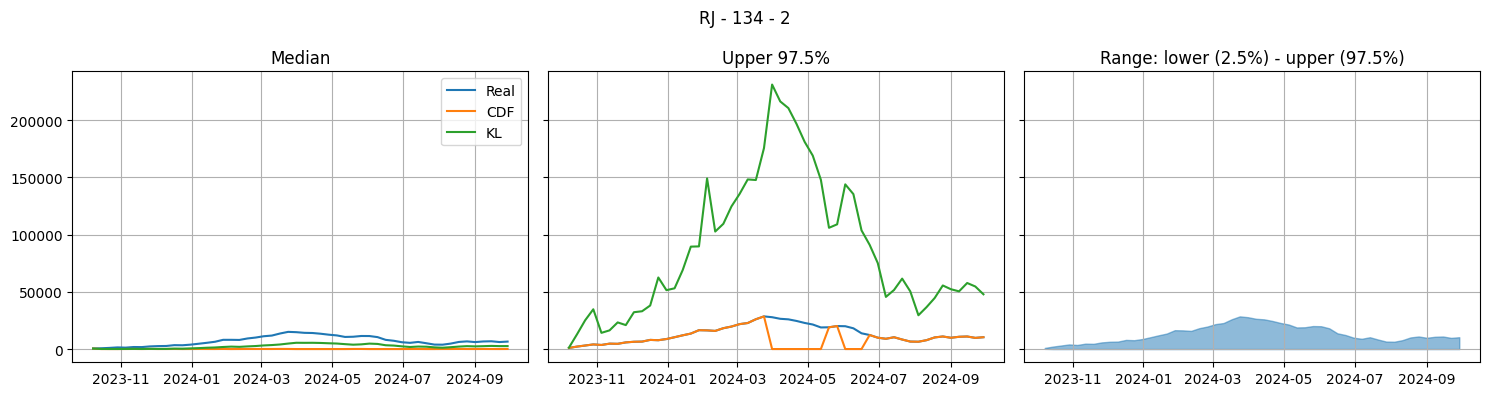

In [42]:
model = df_erros.loc[df_erros.mape_pred_cdf == df_erros.mape_pred_cdf.max()].model_id.values[0]
state = df_erros.loc[df_erros.mape_pred_cdf == df_erros.mape_pred_cdf.max()].state.values[0]
val_test = df_erros.loc[df_erros.mape_pred_cdf == df_erros.mape_pred_cdf.max()].validation_test.values[0]

plot_median_upper(df_aprox, model, state, val_test, save = True)